**Бизнес-постановка задачи** 

Оценка подержанного автомобиля - это достаточно трудная задача, так как на стоимость влияют различные факторы, например, возраст автомобиля, его состояние, пробег и даже личное отношение продавца. Таким образом, цена подержанных автомобилей на рынке не является постоянной. И поскольку нет прозрачности в её образовании, а спрос растет ежегодно, у нечестных предпринимателей возникает стимул иррационально завышать цену. Модель для оценки стоимости подержанного автомобиля помогла бы покупателям не переплатить за желаемое авто, а честным продавцам быстро устанавливать цену, соответствующую их предложениям. 

**Постановка задачи анализа данных** 

Целью данной задачи является прогнозирование цены на подержанные автомобили с помощью построения регрессионных моделей и их анализа. Набор данных состоит из информации о транспортных средствах, выставленных на продажу на сайте Avito. Данные опубликованы в открытом доступе. Для формирования excel файла используется парсер на selenium.

Итак, данные содержат два типа переменных:

* Целевая: **price**
* Остальные переменные: **13 переменных, которые могут использоваться для прогноза целевой переменной.**

## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю. 
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных. 

In [2]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [3]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

# позволяет отображать графики прямо в ноутбуке
%matplotlib inline

**Шаг 1.2. Загрузим данные**



Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.
В функции передаем один атрибут: название таблицы с данными.

In [4]:
parsed_data = pd.read_excel('parsed_car_data.xlsx', usecols=lambda x: 'Unnamed' not in x) # загружаем таблицу в переменную training_data

In [5]:
parsed_data.head()

,Mark,Model,Price,Release_Year,Mileage,Owners,Status,Power,Engine_capacity,Engine_type,Transmission,Drive,Body_type,Color
0,ВАЗ (LADA),2110,90000,2001,255000.0,4+,Не битый,94.0,1.5,Бензин,Механика,Передний,Седан,Синий
1,Nissan,Almera,563500,2014,170000.0,1,Не битый,102.0,1.6,Бензин,Механика,Передний,Седан,Белый
2,Kia,Ceed,1800000,2022,2670.0,1,Не битый,128.0,1.6,Бензин,Автомат,Передний,Хетчбэк,Серебряный
3,Hyundai,Staria,3999000,2022,5000.0,1,Не битый,177.0,2.2,Дизель,Автомат,Передний,Минивэн,Серый
4,ВАЗ (LADA),2114 Samara,79000,2007,164000.0,3,Не битый,81.0,1.6,Бензин,Механика,Передний,Хетчбэк,Серебряный


Ниже в таблице представлено описание каждого из 14 полей.

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**Mark**        |Марка авто                                      |**Status**      |Состояние                                 |
|**Model**       |Модель авто   	                              |**Power**       |Мощность двигателя                        |
|**Price**       |Стоимость       	                              |**Engine_capacity**|Объём двигателя                        |
|**Release_Year**|Год выпуска       	                          |**Engie_type**  |Тип двигателя                             |
|**Mileage**     |Пробег                                          |**Transmission**|Коробка передач                           |
|**Owners**      |Количество владельцев                           |**Drive**       |Привод                                    |
|**Body_type**   |Тип кузова                                      |**Color**       |Цвет                                      |

In [6]:
parsed_data.shape

(17527, 14)

*Что означает первое и второе число?*

Первое число - количество строк (объектов), а второе - количество столбцов (признаков), включая выходной (целевой) признак.
Таблицу проверили, теперь можно приступать к обработке данных.

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [7]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17527 entries, 0 to 17526
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mark             17527 non-null  object 
 1   Model            17527 non-null  object 
 2   Price            17527 non-null  int64  
 3   Release_Year     17527 non-null  int64  
 4   Mileage          17525 non-null  float64
 5   Owners           17527 non-null  object 
 6   Status           17527 non-null  object 
 7   Power            17389 non-null  float64
 8   Engine_capacity  17476 non-null  float64
 9   Engine_type      17527 non-null  object 
 10  Transmission     17527 non-null  object 
 11  Drive            17527 non-null  object 
 12  Body_type        17527 non-null  object 
 13  Color            17527 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.9+ MB


Анализируем результата выполнения команды:

* 999 строк (entries)
* 14 столбцов (Data columns)

В данных присутствует три типа dtypes:
* int64 - целое число  (3 столбца)
* float64 - дробное число (2 столбца)
* object - не число, обычно текст (9 столбцов)

В нашем случае признаки с типом object имеют текстовые значения. 

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (999).

**Шаг 2.2. Удаляем пропуски**

Как мы уже видели выше, в наших данных есть пропуски (значения NaN). Для удобства работы выкинем такие данные из нашего датасета, применив метод **dropna()** к *parsed_data*:

In [8]:
parsed_data = parsed_data.dropna()

In [9]:
parsed_data.shape

(17342, 14)

Также, после выкидывания строк с пропущенными значениями осталось 997 строка из 999. 

Для числовых признаков можно построить гистограмму. Гистограмма - это способ графического представления табличных данных, благодаря которому можно увидеть распределение значений признака. 

Для построения гистограммы необходимо вызвать метод **hist()** у объекта *training_data*. Желательно указать аргумент *figsize*, который устанавливает ожидаемый размер изображения. В нашем случае это (15,15).  

Заметим, что название переменной, по которой строится гистограмма, указано в названии графика.

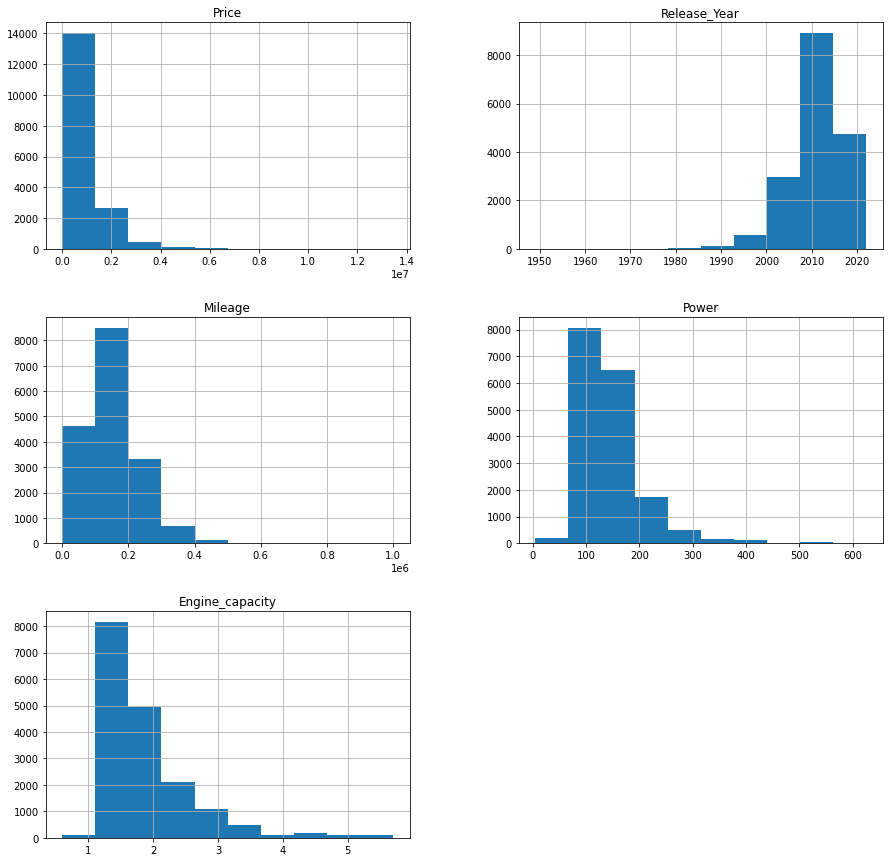

In [10]:
parsed_data.hist(figsize=(15, 15));

In [11]:
# parsed_data = pd.concat([parsed_data,  pd.get_dummies(parsed_data['Mark'], prefix="Mark"), 
#                             pd.get_dummies(parsed_data['Model'], prefix="Model"), 
#                             pd.get_dummies(parsed_data['Owners'], prefix="Owners"), 
#                             pd.get_dummies(parsed_data['Status'], prefix="Status"),
#                             pd.get_dummies(parsed_data['Engine_type'], prefix="Engine_type"),
#                             pd.get_dummies(parsed_data['Transmission'], prefix="Transmission"),
#                             pd.get_dummies(parsed_data['Drive'], prefix="Drive"),
#                             pd.get_dummies(parsed_data['Body_type'], prefix="Body_type"),
#                             pd.get_dummies(parsed_data['Color'], prefix="Color")], axis=1)

**Шаг 2.5 Кодируем категориальные признаки**

**Категориальный** признак - это такой признак, который может принимать одно значение из ограниченного числа возможных.
Используем подход кодирования меток. Кодирование метки - это простое преобразование каждого значения в столбце в число. 

Прием, который вы можете использовать в pandas, - это преобразовать столбец в категорию, а затем использовать эти значения категории для кодирования метки:

In [12]:
parsed_data['Mark'] = parsed_data['Mark'].astype('category')
parsed_data['Model'] = parsed_data['Model'].astype('category')
parsed_data['Owners'] = parsed_data['Owners'].astype('category')
parsed_data['Status'] = parsed_data['Status'].astype('category')
parsed_data['Engine_type'] = parsed_data['Engine_type'].astype('category')
parsed_data['Transmission'] = parsed_data['Transmission'].astype('category')
parsed_data['Drive'] = parsed_data['Drive'].astype('category')
parsed_data['Body_type'] = parsed_data['Body_type'].astype('category')
parsed_data['Color'] = parsed_data['Color'].astype('category')

In [13]:
parsed_data.dtypes

Mark               category
Model              category
Price                 int64
Release_Year          int64
Mileage             float64
Owners             category
Status             category
Power               float64
Engine_capacity     float64
Engine_type        category
Transmission       category
Drive              category
Body_type          category
Color              category
dtype: object

Сохраняем категории в списке (код категории = индекс в списке)

In [14]:
marks_cat = list(parsed_data['Mark'].cat.categories)
model_cat = list(parsed_data['Model'].cat.categories)
owners_cat= list(parsed_data['Owners'].cat.categories)
status_cat = list(parsed_data['Status'].cat.categories)
engine_type_cat = list(parsed_data['Engine_type'].cat.categories)
transmission_cat = list(parsed_data['Transmission'].cat.categories)
drive_cat = list(parsed_data['Drive'].cat.categories)
body_type_cat = list(parsed_data['Body_type'].cat.categories)
color_cat = list(parsed_data['Color'].cat.categories)

In [15]:
marks_cat.index('Mercedes-Benz')

49

Затем вы можете назначить закодированную переменную новому столбцу с помощью метода доступа (accessor) cat.codes:

In [16]:
parsed_data['Mark_cat'] = parsed_data['Mark'].cat.codes
parsed_data['Model_cat'] = parsed_data['Model'].cat.codes
parsed_data['Owners_cat'] = parsed_data['Owners'].cat.codes
parsed_data['Status_cat'] = parsed_data['Status'].cat.codes
parsed_data['Engine_type_cat'] = parsed_data['Engine_type'].cat.codes
parsed_data['Transmission_cat'] = parsed_data['Transmission'].cat.codes
parsed_data['Drive_cat'] = parsed_data['Drive'].cat.codes
parsed_data['Body_type_cat'] = parsed_data['Body_type'].cat.codes
parsed_data['Color_cat'] = parsed_data['Color'].cat.codes
parsed_data.head()

,Mark,Model,Price,Release_Year,Mileage,Owners,Status,Power,Engine_capacity,Engine_type,...,Color,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
0,ВАЗ (LADA),2110,90000,2001,255000.0,4+,Не битый,94.0,1.5,Бензин,...,Синий,74,24,3,1,0,2,1,7,14
1,Nissan,Almera,563500,2014,170000.0,1,Не битый,102.0,1.6,Бензин,...,Белый,51,121,0,1,0,2,1,7,1
2,Kia,Ceed,1800000,2022,2670.0,1,Не битый,128.0,1.6,Бензин,...,Серебряный,40,219,0,1,0,0,1,10,12
3,Hyundai,Staria,3999000,2022,5000.0,1,Не битый,177.0,2.2,Дизель,...,Серый,32,691,0,1,3,0,1,5,13
4,ВАЗ (LADA),2114 Samara,79000,2007,164000.0,3,Не битый,81.0,1.6,Бензин,...,Серебряный,74,28,2,1,0,2,1,10,12


In [17]:
parsed_data.drop(['Mark', 'Model', 'Owners', 'Status', 'Engine_type', 'Transmission', 'Drive', 'Body_type', 'Color'], axis=1, inplace=True)

In [18]:
parsed_data.head()

,Price,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
0,90000,2001,255000.0,94.0,1.5,74,24,3,1,0,2,1,7,14
1,563500,2014,170000.0,102.0,1.6,51,121,0,1,0,2,1,7,1
2,1800000,2022,2670.0,128.0,1.6,40,219,0,1,0,0,1,10,12
3,3999000,2022,5000.0,177.0,2.2,32,691,0,1,3,0,1,5,13
4,79000,2007,164000.0,81.0,1.6,74,28,2,1,0,2,1,10,12


Разделим исходную выборку на тестовые и тренировачные данные

In [19]:
test_split_data = parsed_data.iloc[16800:]
test_split_data

,Price,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
16976,387000,2002,322895.0,125.0,1.7,30,698,3,1,0,2,1,5,12
16977,300000,2003,130000.0,231.0,1.3,48,608,3,1,0,2,0,2,4
16978,385000,2011,140000.0,84.0,1.2,10,144,1,1,0,2,1,7,16
16979,180000,1995,220000.0,136.0,2.2,53,329,3,1,0,2,2,0,13
16980,1199000,2013,109100.0,294.0,3.5,22,305,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17522,586000,2005,313519.0,190.0,2.4,30,115,3,1,0,0,1,7,14
17523,105000,1993,294500.0,90.0,2.0,2,93,2,1,0,2,1,7,5
17524,60000,2006,150000.0,81.0,1.6,74,25,3,0,0,2,1,8,16
17525,1515000,2014,100156.0,197.0,2.2,32,376,1,1,3,0,2,0,16


In [20]:
parsed_data = parsed_data.iloc[:16799]
parsed_data

,Price,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
0,90000,2001,255000.0,94.0,1.5,74,24,3,1,0,2,1,7,14
1,563500,2014,170000.0,102.0,1.6,51,121,0,1,0,2,1,7,1
2,1800000,2022,2670.0,128.0,1.6,40,219,0,1,0,0,1,10,12
3,3999000,2022,5000.0,177.0,2.2,32,691,0,1,3,0,1,5,13
4,79000,2007,164000.0,81.0,1.6,74,28,2,1,0,2,1,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16970,685000,2012,109000.0,141.0,1.8,10,255,1,1,0,0,1,10,16
16971,230000,2010,138651.0,81.0,1.6,74,430,1,1,0,2,1,10,0
16972,650000,2010,55000.0,150.0,2.0,30,254,0,1,0,0,1,0,16
16973,720000,2011,227000.0,110.0,1.5,58,450,2,1,3,2,1,3,13


**Шаг 2.5. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать стоимость автомобиля, поэтому целевая переменная - это price. 

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. 

In [21]:
training_values = parsed_data['Price']

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *parsed_data* вызвать метод **drop()**. 
   axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [22]:
training_points = parsed_data.drop('Price', axis=1)

Можно посмотреть результаты этих действий, вызвав метод **head()** и поле **shape**, которыми мы пользовались ранее, но сейчас нужно вызывать их от новой переменной *training_points*.

In [23]:
training_points.head()

,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
0,2001,255000.0,94.0,1.5,74,24,3,1,0,2,1,7,14
1,2014,170000.0,102.0,1.6,51,121,0,1,0,2,1,7,1
2,2022,2670.0,128.0,1.6,40,219,0,1,0,0,1,10,12
3,2022,5000.0,177.0,2.2,32,691,0,1,3,0,1,5,13
4,2007,164000.0,81.0,1.6,74,28,2,1,0,2,1,10,12


In [24]:
training_points.shape

(16799, 13)

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов. 
Мы воспользуемся двумя методами для построения моделей и сравним их между собой:
* Линейная регрессия *linear regression*
* Лес решающих деревьев *random forest*

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем два модуля из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели
 * *ensemble* - тут находятся модели на основе ансамблей

In [25]:
from sklearn import linear_model, ensemble

Прежде чем начать делать ремонт, нужно подготовить инструменты для работы. Аналогично в нашем случае, прежде чем обучать модели, нужно создать их прототипы.  
Чтобы создать модель линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

In [26]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

Чтобы создать модель случайного леса, пишем имя модуля ensemble, затем точку, затем название модели. 
Обратите внимание, что для воспроизводимости результата на разных компьютерах необходимо для всех зафиксировать один параметр random_state. Например, можно установить для него значение 123. 

In [27]:
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

У модели на основе случайного леса больше параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.

Так как у модели на основе случайного решающего леса больше параметров, такая модель обычно обучается медленнее.
Кроме этого, на время обучения влияют значения параметров модели. Например, чем больше деревьев в лесе - тем дольше модель будет учиться.

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки. 

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [28]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

Делаем тоже самое для модели решающего леса.

In [29]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=123)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели. 
* Теперь необходимо провалидировать модели на новых тестовых данных. 

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название файла, в котором находится таблица с данными.

In [30]:
# test_data = pd.read_excel('parsed_test.xlsx', usecols=lambda x: 'Unnamed' not in x)

*Что важно посмотреть, после того, как мы загрузили данные?*

- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.


In [31]:
# test_data.head()

In [32]:
test_split_data.shape

(542, 14)

In [33]:
# test_data['Mark_cat'] = test_data['Mark'].astype('category').cat.codes
# test_data['Model_cat'] = test_data['Model'].astype('category').cat.codes
# test_data['Owners_cat'] = test_data['Owners'].astype('category').cat.codes
# test_data['Status_cat'] = test_data['Status'].astype('category').cat.codes
# test_data['Engine_type_cat'] = test_data['Engine_type'].astype('category').cat.codes
# test_data['Transmission_cat'] = test_data['Transmission'].astype('category').cat.codes
# test_data['Drive_cat'] = test_data['Drive'].astype('category').cat.codes
# test_data['Body_type_cat'] = test_data['Body_type'].astype('category').cat.codes
# test_data['Color_cat'] = test_data['Color'].astype('category').cat.codes


In [34]:
test_split_data.head()

,Price,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
16976,387000,2002,322895.0,125.0,1.7,30,698,3,1,0,2,1,5,12
16977,300000,2003,130000.0,231.0,1.3,48,608,3,1,0,2,0,2,4
16978,385000,2011,140000.0,84.0,1.2,10,144,1,1,0,2,1,7,16
16979,180000,1995,220000.0,136.0,2.2,53,329,3,1,0,2,2,0,13
16980,1199000,2013,109100.0,294.0,3.5,22,305,0,1,0,0,2,0,1


**Шаг 4.2. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [35]:
test_values = test_split_data['Price']

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. 
Для это нужно у переменной *test_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *test_points*. После выполнения запроса *test_points* будет содержать исходную таблицу без целевого столбца. 

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [36]:
test_points = test_split_data.drop('Price', axis=1)

И проверяем результат записанный в test_points:

In [37]:
test_points.head()

,Release_Year,Mileage,Power,Engine_capacity,Mark_cat,Model_cat,Owners_cat,Status_cat,Engine_type_cat,Transmission_cat,Drive_cat,Body_type_cat,Color_cat
16976,2002,322895.0,125.0,1.7,30,698,3,1,0,2,1,5,12
16977,2003,130000.0,231.0,1.3,48,608,3,1,0,2,0,2,4
16978,2011,140000.0,84.0,1.2,10,144,1,1,0,2,1,7,16
16979,1995,220000.0,136.0,2.2,53,329,3,1,0,2,2,0,13
16980,2013,109100.0,294.0,3.5,22,305,0,1,0,0,2,0,1


In [38]:
test_points.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 16976 to 17526
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release_Year      542 non-null    int64  
 1   Mileage           542 non-null    float64
 2   Power             542 non-null    float64
 3   Engine_capacity   542 non-null    float64
 4   Mark_cat          542 non-null    int8   
 5   Model_cat         542 non-null    int16  
 6   Owners_cat        542 non-null    int8   
 7   Status_cat        542 non-null    int8   
 8   Engine_type_cat   542 non-null    int8   
 9   Transmission_cat  542 non-null    int8   
 10  Drive_cat         542 non-null    int8   
 11  Body_type_cat     542 non-null    int8   
 12  Color_cat         542 non-null    int8   
dtypes: float64(3), int16(1), int64(1), int8(8)
memory usage: 26.5 KB


Сравним наборы признаков в тестовой и обучающей выборке


In [39]:
list(test_points)==list(training_points)

True

# 5. Провалидировать модель на тестовой выборке

**Шаг 5.1. Сравнение моделей.**

Теперь мы готовы сравнить качество двух моделей! 😎

*1. Какая модель лучше?*

Получим прогнозы целевой переменной на тестовых данных для модели линейной регрессии м модели случайного леса. 

Для этого вызовем у каждой модели метод **predict()**, в качестве аргумента передадим *test_points*.

In [40]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [41]:
test_predictions_random_forest = random_forest_model.predict(test_points)

Качество регрессионных моделей оценим двумя способами: 
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки

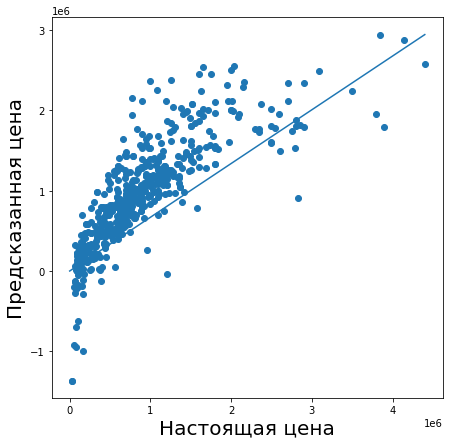

In [42]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки

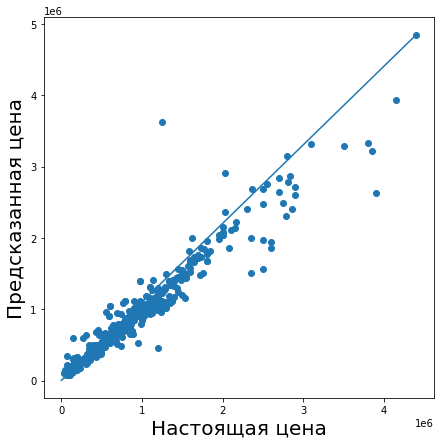

In [43]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки **sklearn**. 

Мы используем две метрики качества:
 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$
 * *RMSE* - корень из *mean_squared_error*

Кажется, что лучше сработала модель случайного леса, так как точки на втором изображении расположены вдоль диагонали. На первом изображении видно, что для высоких настоящих цен модель линейной регрессии дает существенно заниженный результат. 

Проверим, так ли это с помощью **метрик качества регрессионной модели**

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_linear*.

In [45]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)
r2_score_linear_model = r2_score(test_values, test_predictions_linear)

Подсчитаем ошибки для модели случайного леса.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_random_forest*.

In [46]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(test_values, test_predictions_random_forest)


Теперь напечатаем полученные ошибки.

In [47]:
print("Linear")
print("средняя абсолютная ошибка: {0:7.2f}, средняя квадратичная ошибка: {1:7.2f}, оценка r2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear), 
        mean_squared_error(test_values, test_predictions_linear)**0.5, r2_score_linear_model))

print("Forest")
print("средняя абсолютная ошибка: {0:7.2f}, средняя квадратичная ошибка: {1:7.2f}, оценка r2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest), 
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, r2_score_random_forest_model))


Linear
средняя абсолютная ошибка: 291166.42, средняя квадратичная ошибка: 423942.96, оценка r2:    0.60 for linear model
Forest
средняя абсолютная ошибка: 92239.96, средняя квадратичная ошибка: 190314.35, оценка r2:    0.92 for random forest model


Модель случайного леса работает лучше и визуально, и потому, что абсолютная и средне квадратичная ошибка меньше для линейной регресии.

Мы получили значения метрик ошибок наших моделей. Чтобы понять, насколько это нас утсраивает, важно взглянуть на исходный порядок цен на автомобили.
Видно, что средняя цена имеет порядок 20 000 долларов, что означает, что полученная ошибка может удовлетворять предъявляемым требованиям к модели регрессии.

In [48]:
mark = 'Mazda'
model = '6'
release_year = 2016
mileage = 89306
owners = '1'
status = 'Не битый'
power_engine = 192
engine_capacity = 2.5
engine_type = 'Бензин'
transmission = 'Автомат'
drive = 'Передний'
body_type = 'Седан'
color = 'Белый'

# Преобразуем введённые данные к виду, который поддерживает модель

try:
    mark = marks_cat.index(mark)
    model = model_cat.index(model)
    owners = owners_cat.index(owners)
    status = status_cat.index(status)
    engine_type = engine_type_cat.index(engine_type)
    transmission = transmission_cat.index(transmission)
    drive = drive_cat.index(drive)
    body_type = body_type_cat.index(body_type)
    color = color_cat.index(color)
except:
    print("There is unsupported value")
    
test = pd.DataFrame({'Release_Year': [release_year], 'Mileage': [mileage], 'Power': [power_engine], 
                         'Engine_capacity': [engine_capacity], 'Mark_cat': [mark], 'Model_cat': [model],
                        'Owners_cat': [owners], 'Status_cat': [status], 
                        'Engine_type_cat': [engine_type], 'Transmission_cat': [transmission], 
                        'Drive_cat': [drive], 'Body_type_cat': [body_type], 
                        'Color_cat': [color]})

In [49]:
example_linear = linear_regression_model.predict(test)
example_forest = random_forest_model.predict(test)

In [50]:
print(f"{example_linear[0]} {example_forest[0]}")

1579737.2429262996 1751190.0
